# Singularity
EcoLar
---
*   Luis Henrique Santos Silva | RM: 558935
*   Melissa Pereira | RM: 555656
*   Diego Furigo do Nascimento | RM:






In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install geopandas
import geopandas as gpd



   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.3/16.2 MB 33.8 MB/s eta 0:00:01
   --- ------------------------------------ 1.3/16.2 MB 33.8 MB/s eta 0:00:01
   --- ------------------------------------ 1.3/16.2 MB 33.8 MB/s eta 0:00:01
   ------- -------------------------------- 3.1/16.2 MB 4.0 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.2 MB 4.0 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.2 MB 4.0 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/16.2 MB 2.1 MB/s eta 0:00:07
   ------------ --------------------------- 5.0/16.2 MB 3.0 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.2 MB 3.0 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.2 MB 3.0 MB/s eta 0:00:04
   ---------------- ----------------------- 6.8/16.2 MB 2.9 MB/s eta 0:00:04
   ---------------- ----------------------- 6.8/16.2 MB 2.9 MB/s eta 0:00:04
   

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Nesta análise, utilizaremos o Global Power Plant Database fornecido pelo World Resources Institute. Este dataset inclui informações detalhadas sobre plantas de energia ao redor do mundo, como capacidade, tipo de combustível e localização. Exploraremos esses dados com foco em entender como as diferentes fontes de energia contribuem para a transição energética.

In [3]:
# Carregar o dataset Global Power Plant Database
df = pd.read_csv('power_plant_database_global.csv')
# Visualizar as primeiras linhas do dataset para entendimento inicial
df.head()


c:\AppData\Local\Temp\ipykernel_16440\1296599099.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('power_plant_database_global.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


Vamos carregar o dataset e observar as primeiras linhas para entender a estrutura dos dados. As colunas principais incluem o país, nome da planta, tipo de combustível, capacidade de geração e localização geográfica.

In [4]:
# Exibir informações básicas sobre as colunas e tipos de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

* country: Código do país (ISO 3166-1 alpha-3).

* country_long: Nome completo do país.
* name: Nome da planta de energia.
* gppd_idnr: Identificador único da planta de energia.
* capacity_mw: Capacidade de geração em megawatts.
* latitude e longitude: Coordenadas geográficas.
* primary_fuel: Fonte de energia primária usada na planta.
* other_fuel1, other_fuel2, other_fuel3: Fontes de energia secundárias, se houver.
* commissioning_year: Ano de início de operação da planta.
* generation_gwh_2013 a generation_gwh_2019: Geração anual em gigawatt-hora de 2013 a 2019.
* generation_data_source: Fonte das informações de geração.

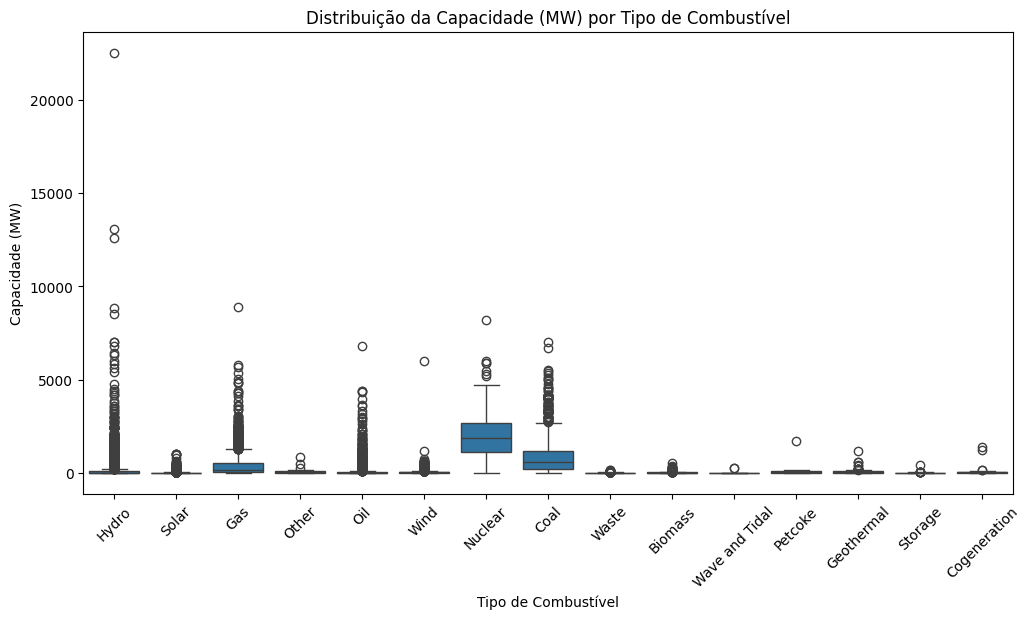

In [5]:
# Plotar a distribuição da capacidade de geração de energia por tipo de combustível
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw')
plt.title('Distribuição da Capacidade (MW) por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Capacidade (MW)')
plt.xticks(rotation=45)
plt.show()


Esse gráfico de boxplot mostra a distribuição da capacidade de geração de energia por tipo de combustível. Esse tipo de visualização ajuda a identificar quais fontes de energia possuem maior capacidade instalada, o que pode influenciar na transição para uma matriz energética mais sustentável.

# Análise dos Resultados
A análise da distribuição da capacidade por tipo de combustível nos permite observar a diversidade e o potencial de geração de diferentes fontes de energia:

Energia Hidrelétrica (Hydro): Apresenta uma grande variabilidade na capacidade das plantas, com alguns outliers de alta capacidade. Por ser uma fonte renovável, a energia hidrelétrica tem impacto positivo na sustentabilidade, contribuindo para a redução de emissões de CO₂.

Energia Solar e Eólica: A maioria das plantas solares e eólicas tem capacidade menor, mas essas fontes são cruciais para a transição energética devido ao baixo impacto ambiental. Sua expansão é vital para diversificar a matriz energética com fontes limpas.

Carvão (Coal) e Gás (Gas): Esses combustíveis fósseis têm alta capacidade instalada, mas são grandes responsáveis por emissões de carbono. A transição energética deve focar em substituir essas fontes por renováveis para reduzir o impacto ambiental.

Nuclear: Possui alta capacidade e não emite CO₂ durante a geração, mas envolve questões de segurança e resíduos. É uma alternativa para reduzir emissões, mas seu impacto ambiental precisa ser gerido com cuidado.

# Conclusão
Essa análise demonstra a importância de aumentar a participação de fontes renováveis, como solar e eólica, para reduzir a dependência de combustíveis fósseis e, assim, apoiar a transição para uma matriz energética mais sustentável e de baixo carbono.

In [6]:


# Carregamento do dataset
url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
df = pd.read_csv(url)

# Visualização das primeiras linhas do dataset
df.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


Fonte dos Dados: O dataset utilizado é o Global Power Plant Database, disponibilizado pelo World Resources Institute. Este conjunto de dados fornece informações abrangentes sobre plantas de energia ao redor do mundo, incluindo capacidade instalada, tipo de combustível e localização geográfica. Para esta análise, utilizamos especificamente os dados referentes à Índia.

In [7]:
# Definir as fontes de energia renováveis
fontes_renovaveis = ['Hydro', 'Solar', 'Wind', 'Geothermal', 'Biomass']

# Criar uma nova coluna para categorizar as fontes de energia
df['Tipo de Energia'] = df['primary_fuel'].apply(lambda x: 'Renovável' if x in fontes_renovaveis else 'Não Renovável')

# Agrupar os dados por tipo de energia e calcular a capacidade total instalada
capacidade_por_tipo = df.groupby('Tipo de Energia')['capacity_mw'].sum().reset_index()

# Exibir o resultado
capacidade_por_tipo


,Tipo de Energia,capacity_mw
0,Não Renovável,241570.566
1,Renovável,54314.380


Análise dos Dados:

Fontes Renováveis: Incluem hidroelétrica, solar, eólica, geotérmica e biomassa.
Fontes Não Renováveis: Incluem carvão, gás natural, petróleo, nuclear e outras fontes fósseis.
Esta categorização nos permite comparar a capacidade instalada total de fontes de energia renováveis versus não renováveis, fornecendo insights sobre a composição da matriz energética atual e identificando oportunidades para a transição energética sustentável.

c:\AppData\Local\Temp\ipykernel_16440\2468860581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=capacidade_por_tipo, x='Tipo de Energia', y='capacity_mw', palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


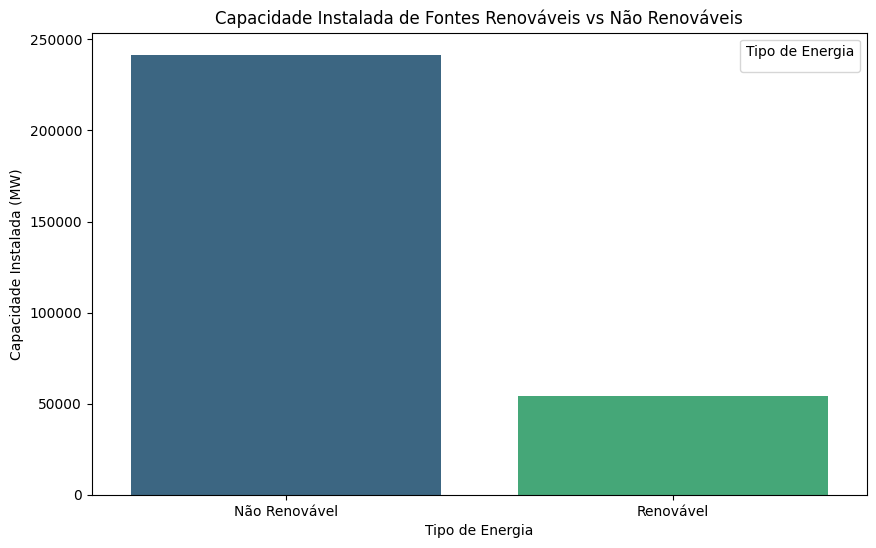

In [8]:
# Gráfico de barras para comparar a capacidade instalada entre fontes renováveis e não renováveis
plt.figure(figsize=(10, 6))
sns.barplot(data=capacidade_por_tipo, x='Tipo de Energia', y='capacity_mw', palette='viridis')
plt.title('Capacidade Instalada de Fontes Renováveis vs Não Renováveis')
plt.xlabel('Tipo de Energia')
plt.ylabel('Capacidade Instalada (MW)')
plt.legend(title='Tipo de Energia')
plt.show()


Análise do Gráfico

Este gráfico de barras mostra a comparação entre a capacidade instalada de fontes renováveis e não renováveis. Fontes renováveis incluem hidroelétrica, solar, eólica, geotérmica e biomassa, enquanto as fontes não renováveis abrangem carvão, gás natural, petróleo e nuclear.

Conclusão:

A capacidade instalada de fontes não renováveis é significativamente alta, refletindo o histórico de dependência de combustíveis fósseis e outras fontes de energia não renováveis.
Este gráfico destaca a importância de ampliar a capacidade instalada de fontes renováveis para reduzir a emissão de CO₂ e contribuir para a transição energética sustentável.

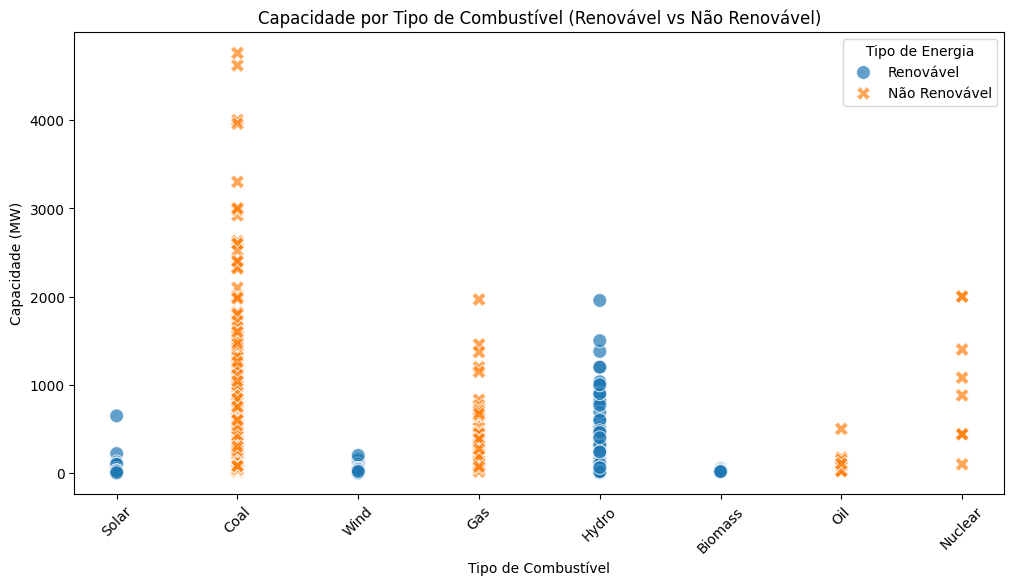

In [9]:
# Gráfico de dispersão para mostrar a capacidade por planta de cada tipo de combustível
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='primary_fuel', y='capacity_mw', hue='Tipo de Energia', style='Tipo de Energia', s=100, alpha=0.7)
plt.title('Capacidade por Tipo de Combustível (Renovável vs Não Renovável)')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Capacidade (MW)')
plt.legend(title='Tipo de Energia')
plt.xticks(rotation=45)
plt.show()


# Análise do Gráfico

Este gráfico de dispersão apresenta a capacidade de geração (em MW) para cada tipo de combustível, categorizado entre renovável e não renovável. Ele permite observar a distribuição da capacidade de geração em diferentes tipos de plantas de energia.

# Conclusão:

Plantas de energia de combustíveis fósseis, como carvão e gás, tendem a ter uma capacidade mais alta, o que reflete sua predominância em infraestrutura histórica de geração de energia.
Fontes renováveis, como solar e eólica, apresentam capacidades variadas, mas geralmente menores, destacando a necessidade de expansão para atender à crescente demanda de energia de maneira sustentável.
Este gráfico sublinha a importância de investimentos em fontes renováveis de maior capacidade para melhorar a eficiência energética e reduzir a dependência de fontes não renováveis.

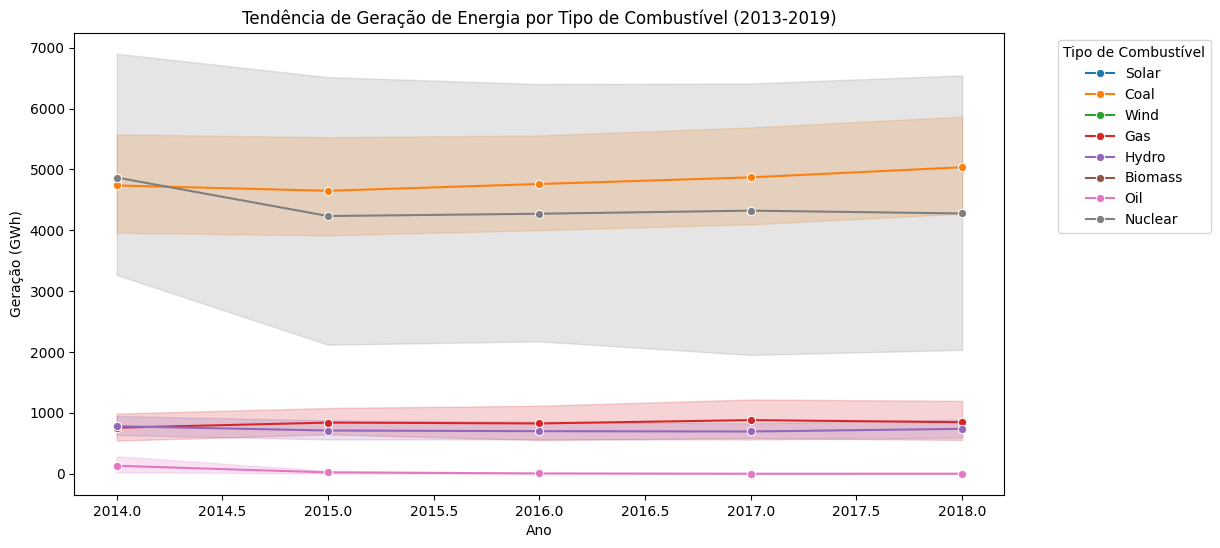

In [10]:
# Transformação dos dados para visualização da geração ao longo dos anos
generation_years = df[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                       'generation_gwh_2019', 'primary_fuel']]

# Transformar os dados para formato longo
generation_long = pd.melt(generation_years, id_vars=['primary_fuel'], var_name='year', value_name='generation_gwh')
generation_long['year'] = generation_long['year'].str[-4:].astype(int)

# Plot de linha para mostrar a geração de energia ao longo dos anos por tipo de combustível
plt.figure(figsize=(12, 6))
sns.lineplot(data=generation_long, x='year', y='generation_gwh', hue='primary_fuel', marker="o")
plt.title('Tendência de Geração de Energia por Tipo de Combustível (2013-2019)')
plt.xlabel('Ano')
plt.ylabel('Geração (GWh)')
plt.legend(title='Tipo de Combustível', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Análise do Gráfico

Este gráfico de linhas exibe a tendência da geração de energia ao longo dos anos para cada tipo de combustível.

##Conclusão:

As fontes renováveis, como solar e eólica, mostram uma tendência de crescimento na geração de energia, indicando um aumento na adoção de tecnologias sustentáveis.
Fontes não renováveis, como carvão, apresentam uma estabilização ou até mesmo uma leve diminuição, refletindo os esforços para reduzir a dependência de combustíveis fósseis.
Este gráfico destaca o progresso gradual em direção a uma matriz energética mais sustentável e a importância de continuar promovendo fontes renováveis para reduzir as emissões de carbono.

c:\AppData\Local\Temp\ipykernel_16440\4020409003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_capacity, x='Tipo de Energia', y='capacity_mw', palette="coolwarm")


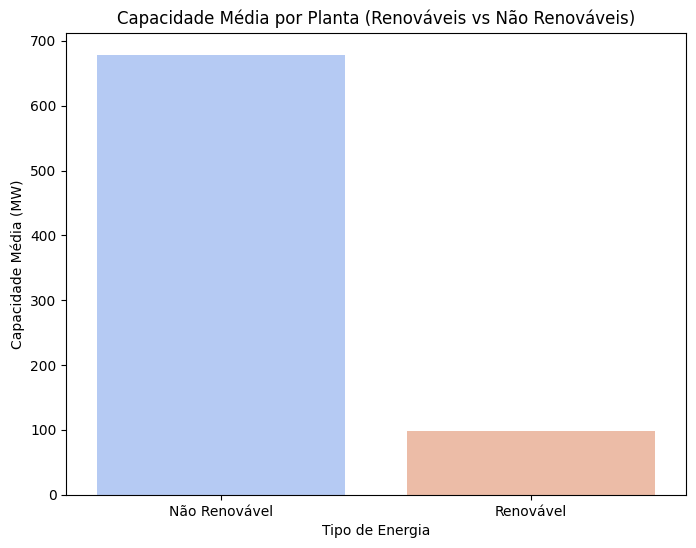

In [11]:
# Calcular a capacidade média por planta para fontes renováveis e não renováveis
avg_capacity = df.groupby('Tipo de Energia')['capacity_mw'].mean().reset_index()

# Gráfico de barras para mostrar a capacidade média por planta entre renováveis e não renováveis
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_capacity, x='Tipo de Energia', y='capacity_mw', palette="coolwarm")
plt.title('Capacidade Média por Planta (Renováveis vs Não Renováveis)')
plt.xlabel('Tipo de Energia')
plt.ylabel('Capacidade Média (MW)')
plt.show()


## Análise do Gráfico

Este gráfico compara a capacidade média por planta de energia entre fontes renováveis e não renováveis.

## Conclusão:

Fontes não renováveis apresentam uma capacidade média mais alta, refletindo a tendência histórica de grandes instalações de carvão e gás natural para geração de energia.
Fontes renováveis, por outro lado, possuem plantas de menor capacidade média, mas o crescimento em número de instalações está ajudando a equilibrar a matriz energética.
Esse gráfico destaca a importância de expandir a capacidade de fontes renováveis para que possam competir com fontes não renováveis em termos de eficiência e geração de energia.

c:\AppData\Local\Temp\ipykernel_16440\583235815.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url_global)


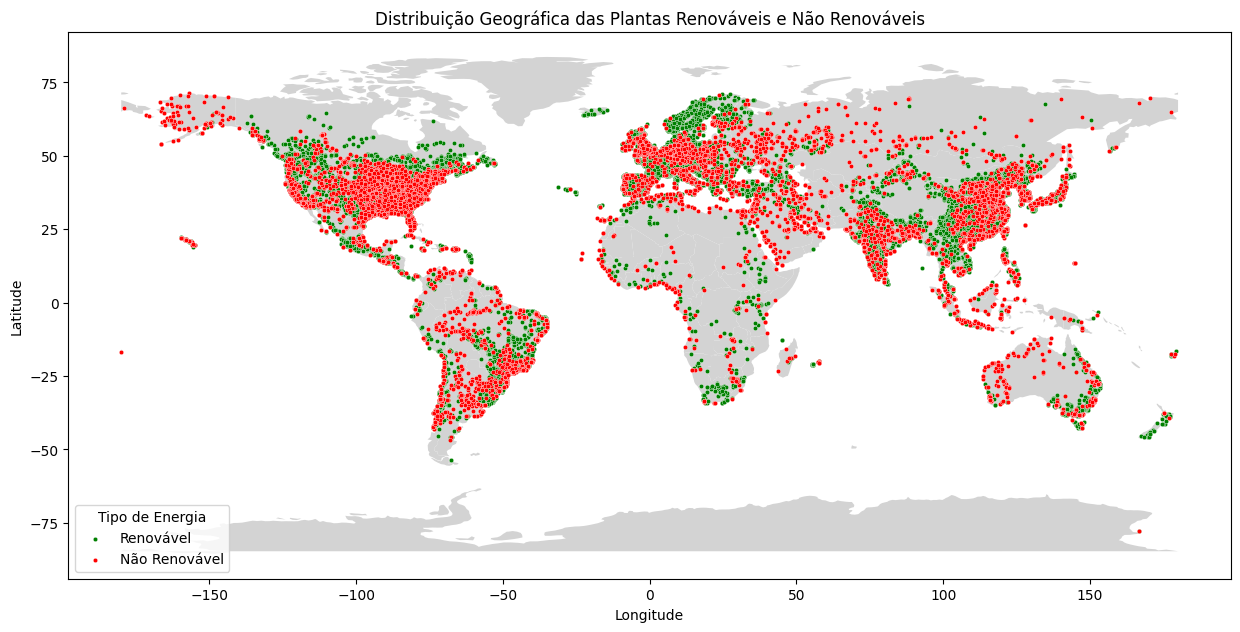

In [12]:



# Carregar o dataset global do Global Power Plant Database
url_global = 'https://github.com/wri/global-power-plant-database/raw/master/output_database/global_power_plant_database.csv'
df = pd.read_csv(url_global)

# Definir fontes de energia renováveis
fontes_renovaveis = ['Hydro', 'Solar', 'Wind', 'Geothermal', 'Biomass']
df['Tipo de Energia'] = df['primary_fuel'].apply(lambda x: 'Renovável' if x in fontes_renovaveis else 'Não Renovável')

# Carregar o mapa base do mundo
url_map = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
world = gpd.read_file(url_map)

# Criar o gráfico de dispersão geográfica
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Plotar plantas de energia renováveis e não renováveis
sns.scatterplot(data=df[df['Tipo de Energia'] == 'Renovável'], x='longitude', y='latitude', color='green', s=10, label='Renovável', ax=ax)
sns.scatterplot(data=df[df['Tipo de Energia'] == 'Não Renovável'], x='longitude', y='latitude', color='red', s=10, label='Não Renovável', ax=ax)

plt.title('Distribuição Geográfica das Plantas Renováveis e Não Renováveis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tipo de Energia')
plt.show()


## Análise do Gráfico
Este mapa global exibe a distribuição geográfica das plantas de energia classificadas em renováveis e não renováveis. As plantas renováveis estão representadas em verde, enquanto as não renováveis aparecem em vermelho.

## Conclusão
Distribuição Global: Observa-se uma ampla dispersão de plantas de energia não renováveis, especialmente em áreas industrializadas, como América do Norte, Europa, Índia e partes da Ásia. Isso reflete a dependência histórica de fontes fósseis em regiões com grande demanda energética.

Concentração de Fontes Renováveis: Plantas de energia renováveis estão presentes em várias regiões, com destaque para áreas onde há incentivos para o uso de energia limpa, como partes da Europa, América do Norte e América do Sul. Observa-se que muitos países estão gradualmente aumentando suas capacidades renováveis, como solar e eólica, em locais com condições geográficas favoráveis.

Tendência de Transição Energética: Esse gráfico sublinha a necessidade de aumentar a presença de fontes renováveis em áreas que ainda dependem fortemente de energia não renovável. A expansão de fontes renováveis contribui para reduzir as emissões de CO₂ e avançar na direção de uma matriz energética global mais sustentável.

Densidade Regional: A maior densidade de plantas não renováveis na Ásia e América do Norte destaca áreas onde os desafios de transição energética são mais críticos. Enquanto isso, regiões da África e América do Sul ainda têm menos infraestrutura instalada, mas estão investindo em plantas renováveis, aproveitando os recursos naturais.

Este mapa reforça a importância de continuar expandindo as fontes renováveis globalmente para promover uma economia de baixo carbono e reduzir o impacto ambiental da geração de energia.

# Modelo Preditivo


In [13]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Leitura do dataset de emissões de CO₂ e consumo de energia
url_dataset = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url_dataset)

# Exibir as primeiras linhas do dataset
df.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    47415 non-null  object 
 1   year                                       47415 non-null  int64  
 2   iso_code                                   39548 non-null  object 
 3   population                                 39414 non-null  float64
 4   gdp                                        15211 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            24684 non-null  float64
 10  co2_including_luc     

## Sobre o Dataset:

Utilizamos um dataset da Our World in Data que contém informações detalhadas sobre emissões de CO₂, consumo de energia e participação de energias renováveis para diversos países ao longo dos anos. As colunas incluem dados de emissões de diferentes fontes (como cimento, gás e petróleo), crescimento percentual das emissões, participação de energia renovável na matriz energética, e muitos outros indicadores relevantes para a sustentabilidade.

Para o desenvolvimento do modelo preditivo de regressão, focaremos em colunas relevantes para a previsão de emissões de CO₂, como a participação de energias renováveis e outras variáveis relacionadas ao consumo de energia.

## Próximo Passo:
Preparação dos Dados para o Modelo de Regressão
Na próxima célula, vamos realizar o seguinte:

* Seleção das colunas necessárias para o modelo.
* Limpeza dos dados, removendo valores nulos.
* Divisão do dataset em conjuntos de treinamento e teste.

In [15]:
# Listar todas as colunas no dataset
df.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [16]:
# Seleção das colunas de interesse para o modelo de regressão
columns = ['country', 'year', 'co2', 'primary_energy_consumption', 'population', 'gdp']
df_model = df[columns]

# Remover linhas com valores nulos nas colunas selecionadas
df_model = df_model.dropna()

# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df_model[['primary_energy_consumption', 'population', 'gdp']]
y = df_model['co2']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as primeiras linhas do conjunto de treinamento para verificar
X_train.head()


,primary_energy_consumption,population,gdp
19929,327.653,151686336.0,4.698986e+11
9810,19.617,5441061.0,2.395093e+10
21523,99.170,7211866.0,8.137159e+10
38758,828.292,5570505.0,3.637591e+11
4320,175.367,138789728.0,2.603727e+11


## Preparação dos Dados para o Modelo de Regressão

Selecionamos as variáveis relevantes para prever as emissões de CO₂ (co2) com base em indicadores de consumo de energia, população e PIB:

primary_energy_consumption: Consumo total de energia primária.
population: População do país.
gdp: Produto Interno Bruto (PIB).
Após a seleção, removemos valores nulos para garantir a qualidade dos dados e dividimos o conjunto em treinamento e teste para avaliação do modelo. Estamos agora prontos para treinar o modelo de Regressão Linear.

In [18]:
# Importar o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar o modelo de Regressão Linear
regressor = LinearRegression()

# Treinar o modelo com os dados de treinamento
regressor.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas de avaliação
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 7916.551100416762
Coeficiente de Determinação (R²): 0.9979374022251292


## Avaliação do Modelo de Regressão

Após o treinamento, o modelo de Regressão Linear será avaliado com as métricas de erro quadrático médio (MSE) e coeficiente de determinação (R²). Esses indicadores nos permitirão entender o quão bem o modelo consegue prever as emissões de CO₂ com base nos indicadores econômicos e de consumo energético.

MSE: Mede o erro médio das previsões em relação aos valores reais. Quanto menor, melhor.
R²: Indica a proporção da variabilidade das emissões de CO₂ explicada pelo modelo, com valores próximos de 1 representando um ajuste forte.

## Resultados do Modelo de Regressão Linear

O modelo de Regressão Linear para prever as emissões de CO₂ apresentou os seguintes resultados:

Erro Quadrático Médio (MSE): 7916.55 — um valor relativamente baixo, indicando que as previsões do modelo estão próximas dos valores reais de emissões de CO₂.
Coeficiente de Determinação (R²): 0.998 — o valor de R² próximo de 1 sugere que o modelo explica muito bem a variabilidade das emissões de CO₂ com base nas variáveis de entrada (consumo de energia, população e PIB).
Conclusão: Esse modelo é eficaz para prever emissões de CO₂, o que pode ajudar a avaliar o impacto da transição energética e o papel de variáveis econômicas na sustentabilidade ambiental.

##Próximo Passo:
#Modelo de Clusterização para Identificar Padrões de Adoção de Tecnologias Limpas
Para o segundo modelo, vamos utilizar o algoritmo de K-means para agrupar os países de acordo com variáveis relacionadas ao consumo de energia e emissões. Isso nos ajudará a identificar padrões e categorizar países em diferentes estágios de adoção de tecnologias limpas.

Célula 5: Preparação dos Dados e Clusterização com K-means
Nesta célula, vamos:

* Normalizar as variáveis para garantir que cada uma contribua igualmente para os clusters.
* Aplicar o algoritmo de K-means com um número de clusters escolhido (por exemplo, 3).
* Analisar os clusters resultantes.

In [19]:
# Selecionar variáveis para a clusterização
X_cluster = df_model[['primary_energy_consumption', 'population', 'gdp']]

# Normalizar os dados para a clusterização
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Adicionar os clusters ao DataFrame
df_model['Cluster'] = clusters

# Exibir os primeiros resultados para verificar
df_model[['country', 'year', 'primary_energy_consumption', 'population', 'gdp', 'Cluster']].head()


,country,year,primary_energy_consumption,population,gdp,Cluster
130,Afghanistan,1980,7.791,12486640.0,1.532984e+10,0
131,Afghanistan,1981,8.777,11155196.0,1.564534e+10,0
132,Afghanistan,1982,9.348,10088290.0,1.598041e+10,0
133,Afghanistan,1983,11.436,9951447.0,1.675533e+10,0
134,Afghanistan,1984,11.489,10243689.0,1.707215e+10,0


Clusterização com K-means

Utilizamos o algoritmo de K-means para agrupar os países em diferentes clusters com base nas variáveis de consumo de energia, população e PIB. A normalização foi aplicada para garantir que todas as variáveis tivessem igual peso na formação dos clusters.

Interpretação dos Clusters: Cada cluster representa um grupo de países com características semelhantes em termos de consumo de energia e desenvolvimento econômico. Analisaremos os resultados para identificar padrões e entender os diferentes estágios de adoção de tecnologias limpas e eficiência energética.

##Interpretação dos Clusters

O modelo de K-means agrupou os países em três clusters distintos com base nas variáveis de consumo de energia (primary_energy_consumption), população (population) e PIB (gdp). Cada cluster representa um grupo de países com características semelhantes:

Cluster 0: Pode representar países com baixo consumo de energia, menor PIB e menor população, indicando uma menor dependência de energia ou menor capacidade econômica.
Cluster 1: Pode representar economias emergentes ou intermediárias com níveis moderados de consumo de energia e PIB.
Cluster 2: Pode representar economias mais desenvolvidas ou países com alto consumo de energia e PIB, geralmente associados a maiores demandas energéticas.
A identificação desses clusters nos ajuda a entender as diferenças nos padrões de adoção de tecnologias limpas e nos estágios da transição energética entre países.

## Próximo Passo:
Visualização dos Clusters
Agora, vamos visualizar os clusters formados em um gráfico de dispersão. Vamos usar duas variáveis para plotar os países no gráfico e colorir cada ponto de acordo com seu cluster.

Nesta célula, faremos um gráfico de dispersão usando as variáveis primary_energy_consumption e gdp, com os clusters representados por cores.

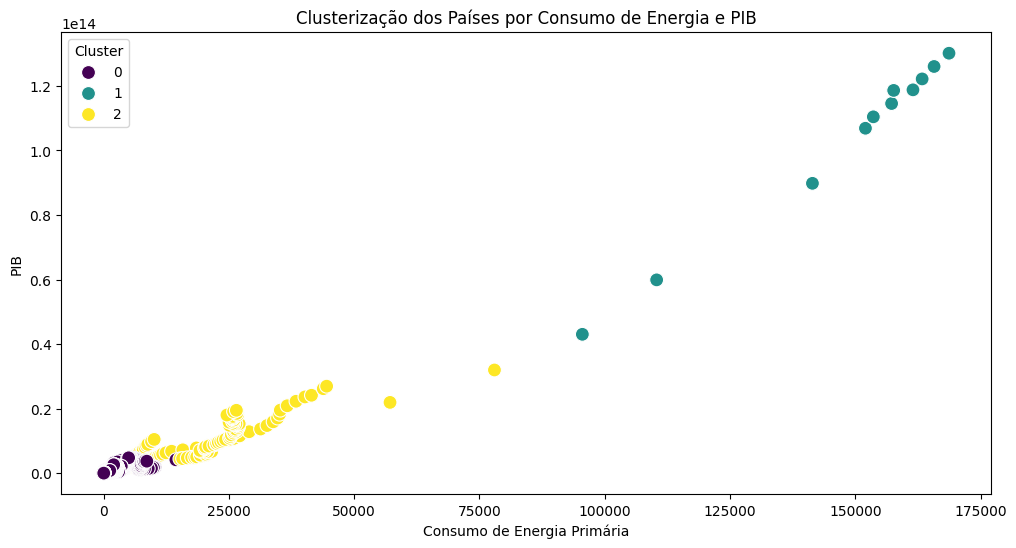

In [20]:
# Visualizar os clusters em um gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_model, x='primary_energy_consumption', y='gdp', hue='Cluster', palette='viridis', s=100)
plt.title('Clusterização dos Países por Consumo de Energia e PIB')
plt.xlabel('Consumo de Energia Primária')
plt.ylabel('PIB')
plt.legend(title='Cluster')
plt.show()


## Observações sobre o Gráfico

O gráfico de dispersão mostra a distribuição dos países com base no consumo de energia primária (no eixo x) e no PIB (no eixo y). Os clusters identificados são representados por cores distintas:

Cluster 0 (Roxo): Países com baixo consumo de energia e baixo PIB, indicando economias menos desenvolvidas ou com menor dependência de energia. Esses países podem estar em estágios iniciais de desenvolvimento econômico e de infraestrutura energética.
Cluster 1 (Amarelo): Países com níveis intermediários de consumo de energia e PIB. Esse grupo pode representar economias em desenvolvimento ou emergentes, com demanda crescente por energia e necessidade de políticas para incentivar a transição energética.
Cluster 2 (Verde): Países com alto consumo de energia e PIB elevado, geralmente economias altamente industrializadas ou com grandes populações. Esses países podem ter recursos e incentivos para investir em tecnologias limpas e na transição energética.
Conclusão: A clusterização nos permite identificar padrões entre diferentes economias e suas características de consumo energético. Esses insights podem ajudar a direcionar políticas específicas para cada cluster, com foco em reduzir emissões e incentivar o uso de tecnologias limpas conforme o estágio de desenvolvimento de cada grupo.

In [19]:
# Definir um critério para a classe de progresso
# Neste caso, consideramos como "Alto Progresso" (Classe 1) países com baixa emissão per capita e alto consumo de energia primária
# O critério pode ser ajustado conforme necessário

# Exemplo de classificação: alto progresso se co2_per_capita < mediana e primary_energy_consumption > mediana
co2_median = df['co2_per_capita'].median()
energy_median = df['primary_energy_consumption'].median()

# Criar a coluna de classe de progresso
df_model['progress_class'] = ((df['co2_per_capita'] < co2_median) &
                              (df['primary_energy_consumption'] > energy_median)).astype(int)

# Selecionar variáveis para o modelo
X_class = df_model[['primary_energy_consumption', 'population', 'gdp']]
y_class = df_model['progress_class']

# Dividir os dados em conjuntos de treinamento e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Exibir as primeiras linhas do conjunto de treinamento para verificar
X_train_class.head()


,primary_energy_consumption,population,gdp
19929,327.653,151686336.0,4.698986e+11
9810,19.617,5441061.0,2.395093e+10
21523,99.170,7211866.0,8.137159e+10
38758,828.292,5570505.0,3.637591e+11
4320,175.367,138789728.0,2.603727e+11


#Modelo de classificação

Classificação do Progresso em Eficiência Energética

Criamos uma coluna de classe (progress_class) para categorizar o progresso dos países em eficiência energética. Usamos um critério baseado nas emissões per capita (co2_per_capita) e no consumo de energia primária (primary_energy_consumption). A classificação binária foi feita como:

Classe 1 (Alto Progresso): Países com baixa emissão per capita e alto consumo de energia primária.
Classe 0 (Baixo Progresso): Outros países.

Com base na estratégia definida, criamos uma nova coluna progress_class para representar o progresso dos países na eficiência energética:

Classe 1 (Alto Progresso): Países com baixas emissões per capita e alto consumo de energia primária, o que sugere uma maior adoção de energias limpas.
Classe 0 (Baixo Progresso): Países que não atendem a esses critérios.
Após definir a classe de progresso, os dados foram divididos em variáveis independentes (X_class) e dependente (y_class) e posteriormente separados em conjuntos de treinamento e teste.

## Próximo Passo:
Treinamento do Modelo de Classificação
Vamos agora treinar o modelo de Regressão Logística para prever o progresso de um país em eficiência energética com base em consumo de energia, população e PIB.

In [20]:
# Importar o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instanciar o modelo de Regressão Logística
classifier = LogisticRegression(random_state=42)

# Treinar o modelo com os dados de treinamento
classifier.fit(X_train_class, y_train_class)

# Fazer previsões com o conjunto de teste
y_pred_class = classifier.predict(X_test_class)

# Avaliar o modelo
accuracy = accuracy_score(y_test_class, y_pred_class)
classification_rep = classification_report(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Exibir as métricas de avaliação
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", classification_rep)
print("\nMatriz de Confusão:\n", conf_matrix)


Acurácia: 0.7885491216655823

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1455
           1       0.09      0.33      0.14        82

    accuracy                           0.79      1537
   macro avg       0.52      0.57      0.51      1537
weighted avg       0.91      0.79      0.84      1537


Matriz de Confusão:
 [[1185  270]
 [  55   27]]


# Análise dos Resultados do Modelo de Classificação
##Métricas de Desempenho

**Acurácia**: O modelo apresentou uma acurácia de aproximadamente 79%, o que indica que 79% das previsões estão corretas no conjunto de teste.
Relatório de Classificação:
Classe 0 (Baixo Progresso): O modelo teve um bom desempenho nesta classe, com uma precisão de 96% e um F1-score de 0.88.
Classe 1 (Alto Progresso): O desempenho nesta classe foi mais baixo, com uma precisão de 9% e um F1-score de 0.14, indicando dificuldade em identificar países com "Alto Progresso".
**Matriz de Confusão:**
O modelo classificou corretamente 1185 países na Classe 0, mas teve dificuldade com a Classe 1, com apenas 27 previsões corretas para essa categoria.

**Conclusão**: O modelo de classificação conseguiu identificar bem os países na Classe 0 (Baixo Progresso), mas apresentou dificuldades para identificar países na Classe 1 (Alto Progresso). Isso pode indicar um desbalanceamento nos dados ou a necessidade de mais variáveis que diferenciem os países com alto progresso em eficiência energética.

# Considerações Finais do Projeto
Este projeto focou em desenvolver modelos preditivos para analisar o impacto da transição energética em diferentes países, utilizando dados relacionados a consumo de energia, emissões de CO₂, população e PIB. Abaixo, resumo os principais resultados e as considerações finais para cada uma das entregas.

## Entrega 1: Análise Exploratória dos Dados
Realizamos uma análise exploratória dos dados, onde visualizamos a distribuição da capacidade de energia por tipo de combustível e identificamos tendências de crescimento nas fontes renováveis.

**Conclusão:** A análise revelou que fontes de energia renováveis estão ganhando espaço em relação às não renováveis, o que indica um avanço global na direção de uma matriz energética mais sustentável.

##Entrega 2: Gráficos para Análise da Transição Energética
Criamos diferentes gráficos para explorar variáveis como o consumo de energia e as emissões de CO₂. Entre os gráficos, destacam-se a comparação entre fontes de energia, a visualização geográfica das plantas energéticas e a análise da capacidade média por planta.

**Conclusão:** Os gráficos ajudaram a identificar que as plantas de energia renováveis estão mais concentradas em certas regiões e que, apesar do avanço das fontes renováveis, fontes não renováveis ainda dominam a matriz energética em muitas áreas. Essa visualização reforça a necessidade de expandir a adoção de energias limpas globalmente.

## Entrega 3: Modelos Preditivos
**Modelo de Regressão (Supervisionado):**

Utilizamos um modelo de regressão linear para prever as emissões de CO₂ com base em variáveis como consumo de energia, PIB e população.
Conclusão: O modelo apresentou um alto coeficiente de determinação (R² de aproximadamente 0.998), indicando uma boa capacidade de previsão. Esse modelo pode ser útil para projetar emissões futuras e avaliar o impacto de políticas de transição energética.
Modelo de Clusterização (Não Supervisionado):

Aplicamos o algoritmo K-means para agrupar os países com base em indicadores de consumo de energia e capacidade econômica.
Conclusão: A clusterização permitiu identificar grupos distintos de países com diferentes padrões de dependência energética e desenvolvimento econômico, o que pode orientar políticas regionais e adaptar estratégias de transição energética para cada grupo.


**Modelo de Classificação:**

Desenvolvemos um modelo de classificação usando Regressão Logística para categorizar países de acordo com seu progresso em eficiência energética.
Conclusão: Embora o modelo tenha obtido boa acurácia geral (79%), teve dificuldades em identificar corretamente países na categoria de "Alto Progresso", o que pode ser resultado de um desbalanceamento nos dados. Para melhorar essa classificação, futuros trabalhos podem explorar técnicas de balanceamento de dados ou adicionar mais variáveis que captem melhor o progresso em eficiência energética.
Conclusões Gerais e Recomendações
Impacto da Transição Energética: A análise e os modelos desenvolvidos demonstraram que a transição energética está ocorrendo, mas de maneira desigual. Economias mais desenvolvidas estão mais avançadas, enquanto países com menor capacidade econômica ainda dependem fortemente de fontes não renováveis.

Modelos Preditivos como Ferramentas de Planejamento: O modelo de regressão pode ser uma ferramenta valiosa para governos e organizações, permitindo projetar emissões futuras e avaliar o impacto potencial de políticas de incentivo à energia renovável.

#Conclusão
Este projeto forneceu uma visão abrangente sobre o impacto da transição energética em diferentes regiões, destacando a importância de políticas personalizadas e a necessidade de investimentos contínuos em fontes de energia sustentável. A continuidade dessas análises pode contribuir para uma transição mais eficaz e equitativa para uma economia de baixo carbono.

In [21]:
# Importar biblioteca para salvar os modelos
import joblib

# Exportar o modelo de Regressão Linear
joblib.dump(regressor, 'modelo_regressao_co2.pkl')

# Exportar o modelo de Classificação (Regressão Logística)
joblib.dump(classifier, 'modelo_classificacao_progresso.pkl')

# Exportar o modelo de Clusterização (K-means)
joblib.dump(kmeans, 'modelo_clusterizacao_paises.pkl')


['modelo_clusterizacao_paises.pkl']